<a href="https://colab.research.google.com/github/revoberliana/demo/blob/main/credit%20scorring%20with%20decision%20tree%20models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CLASSIFICATION CREDIT SCORING DENGAN MODEL DECISION TREE**


**Business Understanding**

---
1. Data : Data Credit Approval dengan
Data Aplikasi yaitu berisikan data data
informasi si pelamar, yang dapat Anda
gunakan sebagai fitur untuk memprediksi.
Data Credit yaitu berisikan rekam bulan
keuangan pelamar, mencatat perilaku
pengguna kartu kredit.
2. Tujuan : memprediksi apakah pelamar
adalah klien 'baik' atau 'buruk'
Untuk pelamar baik approve
Untuk pelamar buruk tidak di approve
3. Model yang digunakan :
Decision Tree
4. Tujuan :
kemampuannya untuk mem-break down proses
pengambilan keputusan yang kompleks menjadi
lebih simple, sehingga pengambil keputusan akan
lebih menginterpretasikan solusi dari
permasalahan

#**Importing Packages**

---



In [ ]:
!pip install openpyxl # library used to read and write Excel 2010 
import openpyxl
import pandas as pd # memanggil fungsi tabular
import numpy as np # memanggil fungsi aritmatika
from matplotlib import pyplot as plt # visualisasi normal
import seaborn as sns # visualisasi komprehensif (heatmap, violin, degradasi, raw time)
sns.set()

#**Importing Data//Scrapping Data**

---



In [ ]:
application_details = pd.read_csv('/content/drive/MyDrive/Ruang Guru/kelompok/classification SC Final Project/credit scoring/application_record.csv') # membaca data application dan disimpan sebagai application_details
credit_record = pd.read_csv('/content/drive/MyDrive/Ruang Guru/kelompok/classification SC Final Project/credit scoring/credit_record.csv') # membaca data credit dan disimpan sebagai credit_record

#**Data Summary // data understanding**

---



In [ ]:
application_details.info() # melihat info terkait kolom tipe data dan juga missing value dalam application_detalis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

--**Insight**--


*   Terdapat 18 fitur yang merepresentasikan informasi tentang artikel tersebut, yaitu id, jenis kelamin, dan data email , no telp dan lain sebagainya 
*   didapat bahwa terdapat 3 tipe data yaitu : integer,object dan float
*   Hampir semua fitur tidak memiliki missing values. Hanya fitur Occupation_type yaitu pekerjaan yang memiliki missing value ( 304354 dari 438557)






In [ ]:
application_details.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,438557.0,6.022176e+06,571637.023257,5008804.0,5609375.0,6047745.0,6456971.0,7999952.0
CNT_CHILDREN,438557.0,4.273903e-01,0.724882,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,438557.0,1.875243e+05,110086.853066,26100.0,121500.0,160780.5,225000.0,6750000.0
DAYS_BIRTH,438557.0,-1.599790e+04,4185.030007,-25201.0,-19483.0,-15630.0,-12514.0,-7489.0
DAYS_EMPLOYED,438557.0,6.056368e+04,138767.799647,-17531.0,-3103.0,-1467.0,-371.0,365243.0
FLAG_MOBIL,438557.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,438557.0,2.061328e-01,0.404527,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,438557.0,2.877710e-01,0.452724,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,438557.0,1.082071e-01,0.310642,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,438557.0,2.194465e+00,0.897207,1.0,2.0,2.0,3.0,20.0


--**Insight**--

*   Untuk fitur jumlah anak: max(19) min(0) 
*   fitur jumlah pendapatan total : max(6750000) min(26100)
*   days_birth : Hitung mundur dari hari ini (0), -1 berarti kemarin 
*   days_employed : Hitung mundur dari hari ini (0). Jika positif, berarti orang tersebut sedang menganggur.

In [ ]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


--**Insight**--


*   Terdapat 3 fitur yang merepresentasikan informasi tentang artikel tersebut, yaitu ID, Rekam Bulan dan Status
*   didapat bahwa terdapat 2 tipe data yaitu : integer dan object
*   semua fitur tidak memiliki missing values

In [ ]:
credit_record.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1048575.0,5.068286e+06,46150.578505,5001711.0,5023644.0,5062104.0,5113856.0,5150487.0
MONTHS_BALANCE,1048575.0,-1.913700e+01,14.023498,-60.0,-29.0,-17.0,-7.0,0.0


--**Insight**--

*   record month: Bulan dari data yang diekstraksi adalah titik awal, mundur, 0 adalah bulan saat ini, -1 adalah bulan sebelumnya : max record_month = 0 dan min record_month =-6 (6 bulan)





#**Checking Skewness**

---



In [ ]:
application_details.skew() # mengukur kemiringan distribusi data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


ID                  0.212718
CNT_CHILDREN        1.806941
AMT_INCOME_TOTAL    8.834066
DAYS_BIRTH         -0.160181
DAYS_EMPLOYED       1.739495
FLAG_MOBIL          0.000000
FLAG_WORK_PHONE     1.452898
FLAG_PHONE          0.937568
FLAG_EMAIL          2.522482
CNT_FAM_MEMBERS     0.919676
dtype: float64

--** Insight **--


*   Kemiringan paling besar amount income sebesar 8.8 (kemiringan distribusi data condong ke kiri/left skew)



In [ ]:
credit_record.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


ID                0.163081
MONTHS_BALANCE   -0.620084
dtype: float64

#**Count Plot of Categorical Features: application_details**

---



In [ ]:
def countplot_applicants(features): #package seaborn,countplot = graph sederhana yang menghitung jumlah data yang sama , membuat countplot applicant
    for feature in features:
        plt.figure(figsize=(9, 9))
        ax=sns.countplot(y=application_details[feature], hue='CODE_GENDER' , data=application_details) #memplotkan code_gender
        plt.legend(loc='best')
        total = len(application_details[feature]) #jumlah masing masing diukur dari data application_details
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

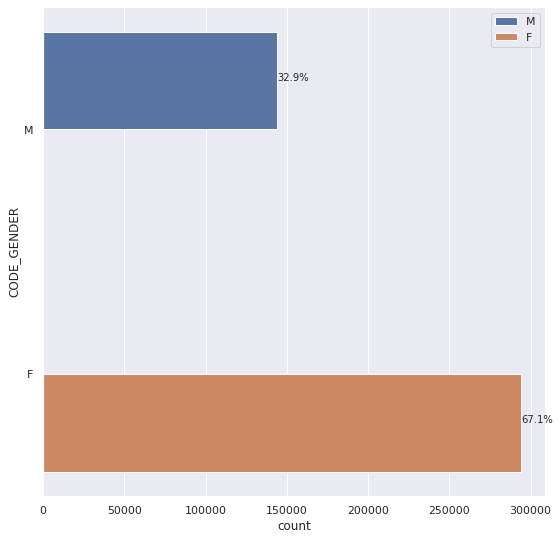

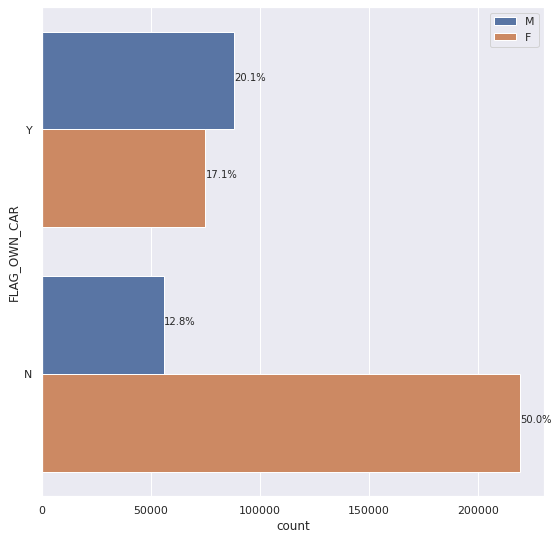

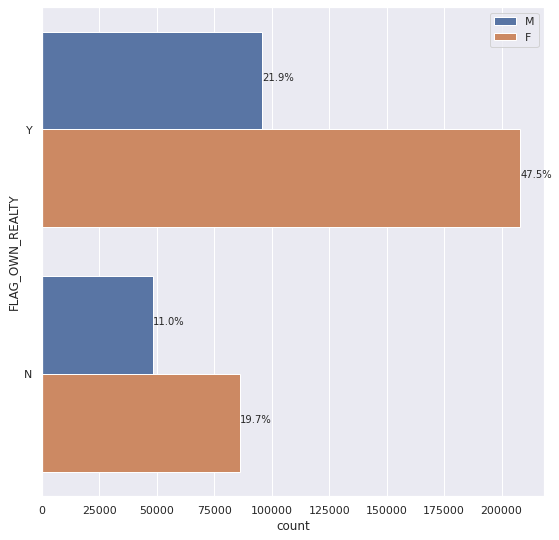

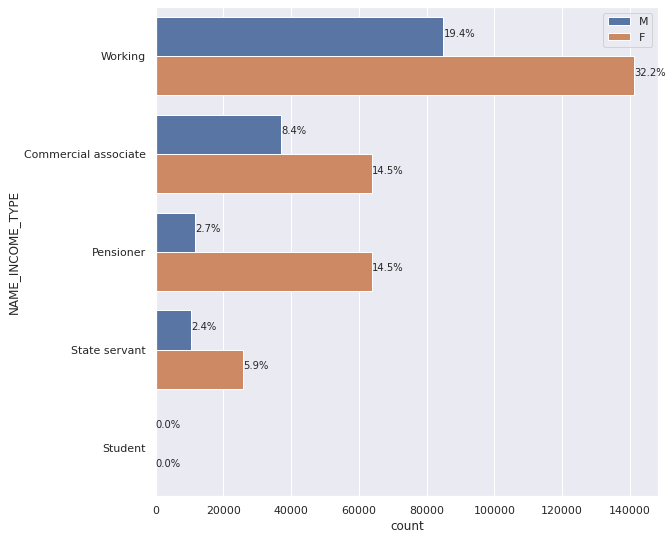

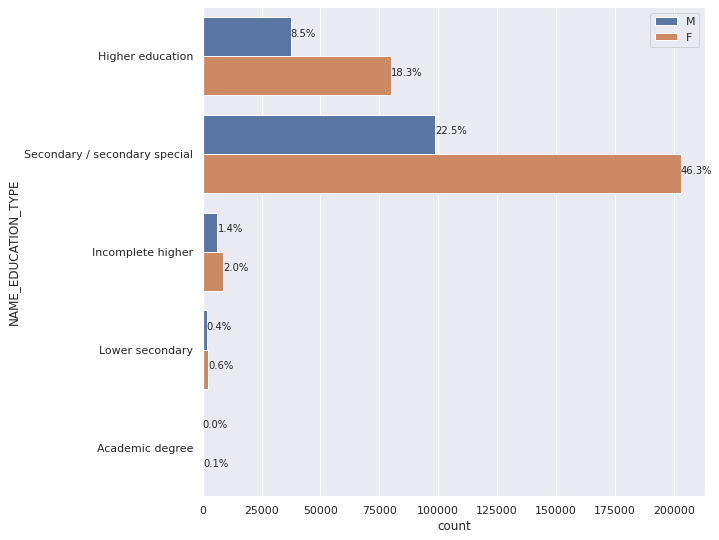

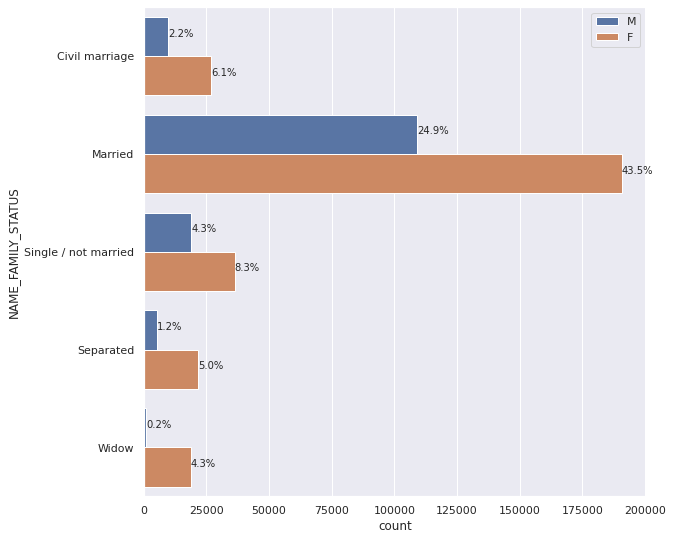

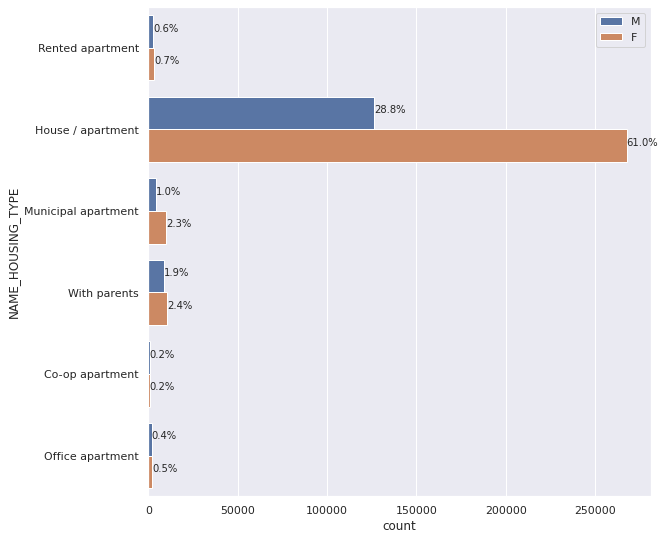

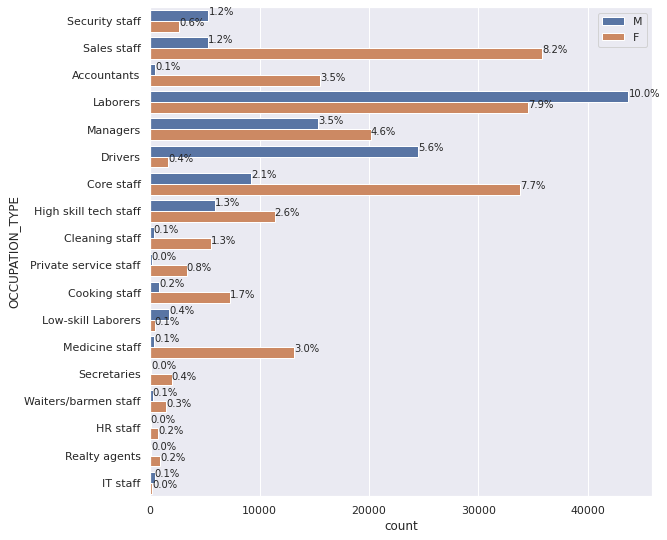

In [ ]:
countplot_applicants(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']) 
#membentuk list untuk menampilkan code_gender, flag_own_car, flag_own_reality, name_income_type hingga occupation_type


Wawasan dari Analisis CountPlot: applictaion_details

Jenis Kelamin (Code_Gender)
2. 36,9% lamaran dari laki-laki dan 67,1% lamaran dari perempuan.

Memiliki Mobil (flag_own_car)
5. 20,1% pelamar pria dan 17,1% pelamar wanita memiliki mobil.
6. 12,8% pelamar pria dan 50% pelamar wanita tidak memiliki mobil.

Memiliki properti
7. 21,9% pelamar pria dan 47,5% pelamar wanita memiliki properti.
8. 11% pelamar pria dan 19,7% pelamar wanita tidak memiliki properti.

tipe edukasi (name_type_education)
9. 19,4% pelamar pria dan 32,2% pelamar wanita bekerja.
10. 8,4% pelamar pria dan 14,5% pelamar wanita adalah rekanan komersial.
11. 2,7% pelamar pria dan 14,5% pelamar wanita adalah pensiunan.
12. 2,4% pelamar pria dan 5,9% pelamar wanita adalah pegawai negeri.
13. 8,5% pelamar pria dan 18,3% pelamar wanita telah menyelesaikan pendidikan tinggi mereka.
14. 22,5% pelamar pria dan 46,3% pelamar wanita telah menyelesaikan pendidikan menengah mereka.
15. 1,4% pelamar pria dan 2% pelamar wanita tidak menyelesaikan pendidikan tinggi.
16. 0,4% pelamar pria dan 0,6% pelamar wanita tidak menyelesaikan pendidikan menengah.
17. 0% pelamar pria dan 0,1% pelamar wanita memiliki gelar akademik.

Status Keluarga (name_family_status)
18. 2,2% pelamar pria dan 6,1% pelamar wanita telah melakukan perkawinan sipil.
19. 24,9% pelamar pria dan 43,5% pelamar wanita sudah menikah.
20. 4,3% pelamar pria dan 8,3% pelamar wanita masih lajang.
21. 1,2% pelamar pria dan 5% pelamar wanita dipisahkan.
22. 0,2% pelamar pria dan 4,3% pelamar wanita janda.

tipe tempat tinggal (name_house_typing)
23. 0,6% pelamar pria dan 0,7% pelamar wanita tinggal di apartemen sewaan.
24. 28,8% pelamar pria dan 61,0% pelamar wanita tinggal di apartemen.
25. 0,6% pelamar pria dan 0,7% pelamar wanita tinggal di apartemen sewaan.
26. 1% pelamar pria dan 2,3% pelamar wanita tinggal di apartemen kota.
27. 1,9% pelamar pria dan 2,4% pelamar wanita tinggal bersama orang tua mereka.
28. 0,4% pelamar pria dan 0,5% pelamar wanita tinggal di apartemen perkantoran.

Detail pekerjaan:
  1. staf keamanan: pria-1,2% dan wanita-0.
6%
  2. staf penjualan: pria-1,2% dan wanita-8,2%
  3. akuntan: pria-0,1% dan wanita-3,5%
  4. tenaga kerja: laki-laki-10% dan perempuan-7,9%
  5. manajer: pria-3,5% dan wanita-4,6%
  6. pengemudi: pria-5,6% dan wanita-0,4%
  7. staf inti: pria-2,1% dan wanita-7,7%
  8. staf teknologi dengan keterampilan tinggi: pria-1,3% dan wanita-2,6%
  9. staf kebersihan: pria-0,1% dan wanita-1,3%
  10. staf layanan swasta: pria-0% dan wanita-0,8%
  11. staf memasak: pria-0,2% dan wanita-1,7%
  12. pekerja berketerampilan rendah: laki-laki-0,4% dan perempuan-0,1%
  13. tenaga medis: laki-laki-0,1% dan perempuan-3%
  14. rahasia: laki-laki-0% dan perempuan-0,4%
  15. pelayan/staf barmen: pria-0,1% dan wanita-0,3%
  16. staf jam: pria-0% dan wanita-0.2%
  17. agen properti: pria-0% dan wanita-0.2%
  18. stafnya: pria-0,1% dan wanita-0%

# **Count Plot of Categorical Features: credit_Record**


---



In [ ]:
def countplot_credit(features): #countplot dari package seaborn bagian credit
    for feature in features:
        plt.figure(figsize=(9, 9))
        ax=sns.countplot(y=credit_record[feature], data=credit_record)
        total = len(credit_record[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

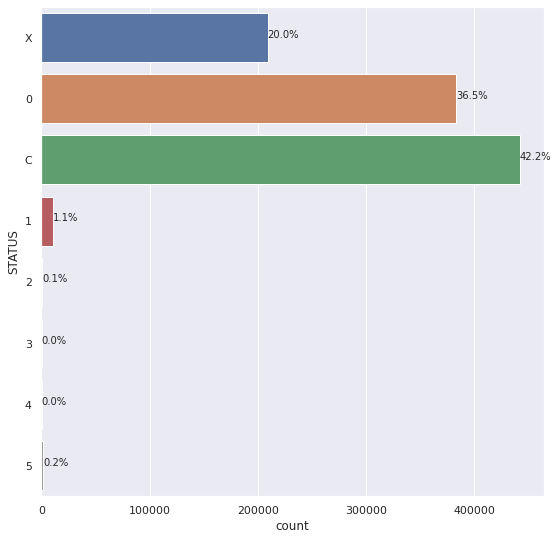

In [ ]:
countplot_credit(['STATUS']) # countplot status

--**Insight**--

Dari Analisis CountPlot: credit_record 

*   C: pinjaman untuk bulan itu sudah dibayar 
*   X: tidak ada pinjaman untuk bulan itu
*   0: pinjaman jatuh tempo 1 hingga 29 hari
*   2: pinjaman 60 hingga 89 hari jatuh tempo
*   3: pinjaman 90 hingga 119 jatuh tempo hari
*   4: pinjaman terlambat 120 hingga 149 hari
*   5: pinjaman terlambat lebih dari 150 hari

Hasil


1.   20% pemohon tidak memiliki pinjaman bulan yang sedang berjalan. 
2.   36,5% pelamar memiliki keterlambatan selama 1-29 hari.
3.   42,2% pemohon sudah membayar pinjaman bulan berjalan.
4.   1,1% pelamar memiliki keterlambatan selama 30-59 hari.
5.   0,1% pelamar memiliki keterlambatan selama 60-89 hari.
6.   0% pelamar memiliki keterlambatan selama 90-119 hari.
7.   0% pelamar memiliki keterlambatan selama 120-149 hari.
8.   0,2% pelamar telah terlambat selama 150 hari.

# **Finding Missing Values from application_details**


---



In [ ]:
application_details.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

 --**Insight**--
 terdapat 134203 missing values di fitur occupation type



In [ ]:
def countplot_occupation(features): #countplot fitur occupation(pekerjaan) yang memiliki missing values
    for feature in features:
        plt.figure(figsize=(30, 30))
        ax=sns.countplot(y=application_details[feature], hue='NAME_EDUCATION_TYPE' , data=application_details) #dengan hue detail visualisasi dari kolom tipe edukasi 
        plt.legend(loc='best')
        total = len(application_details[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

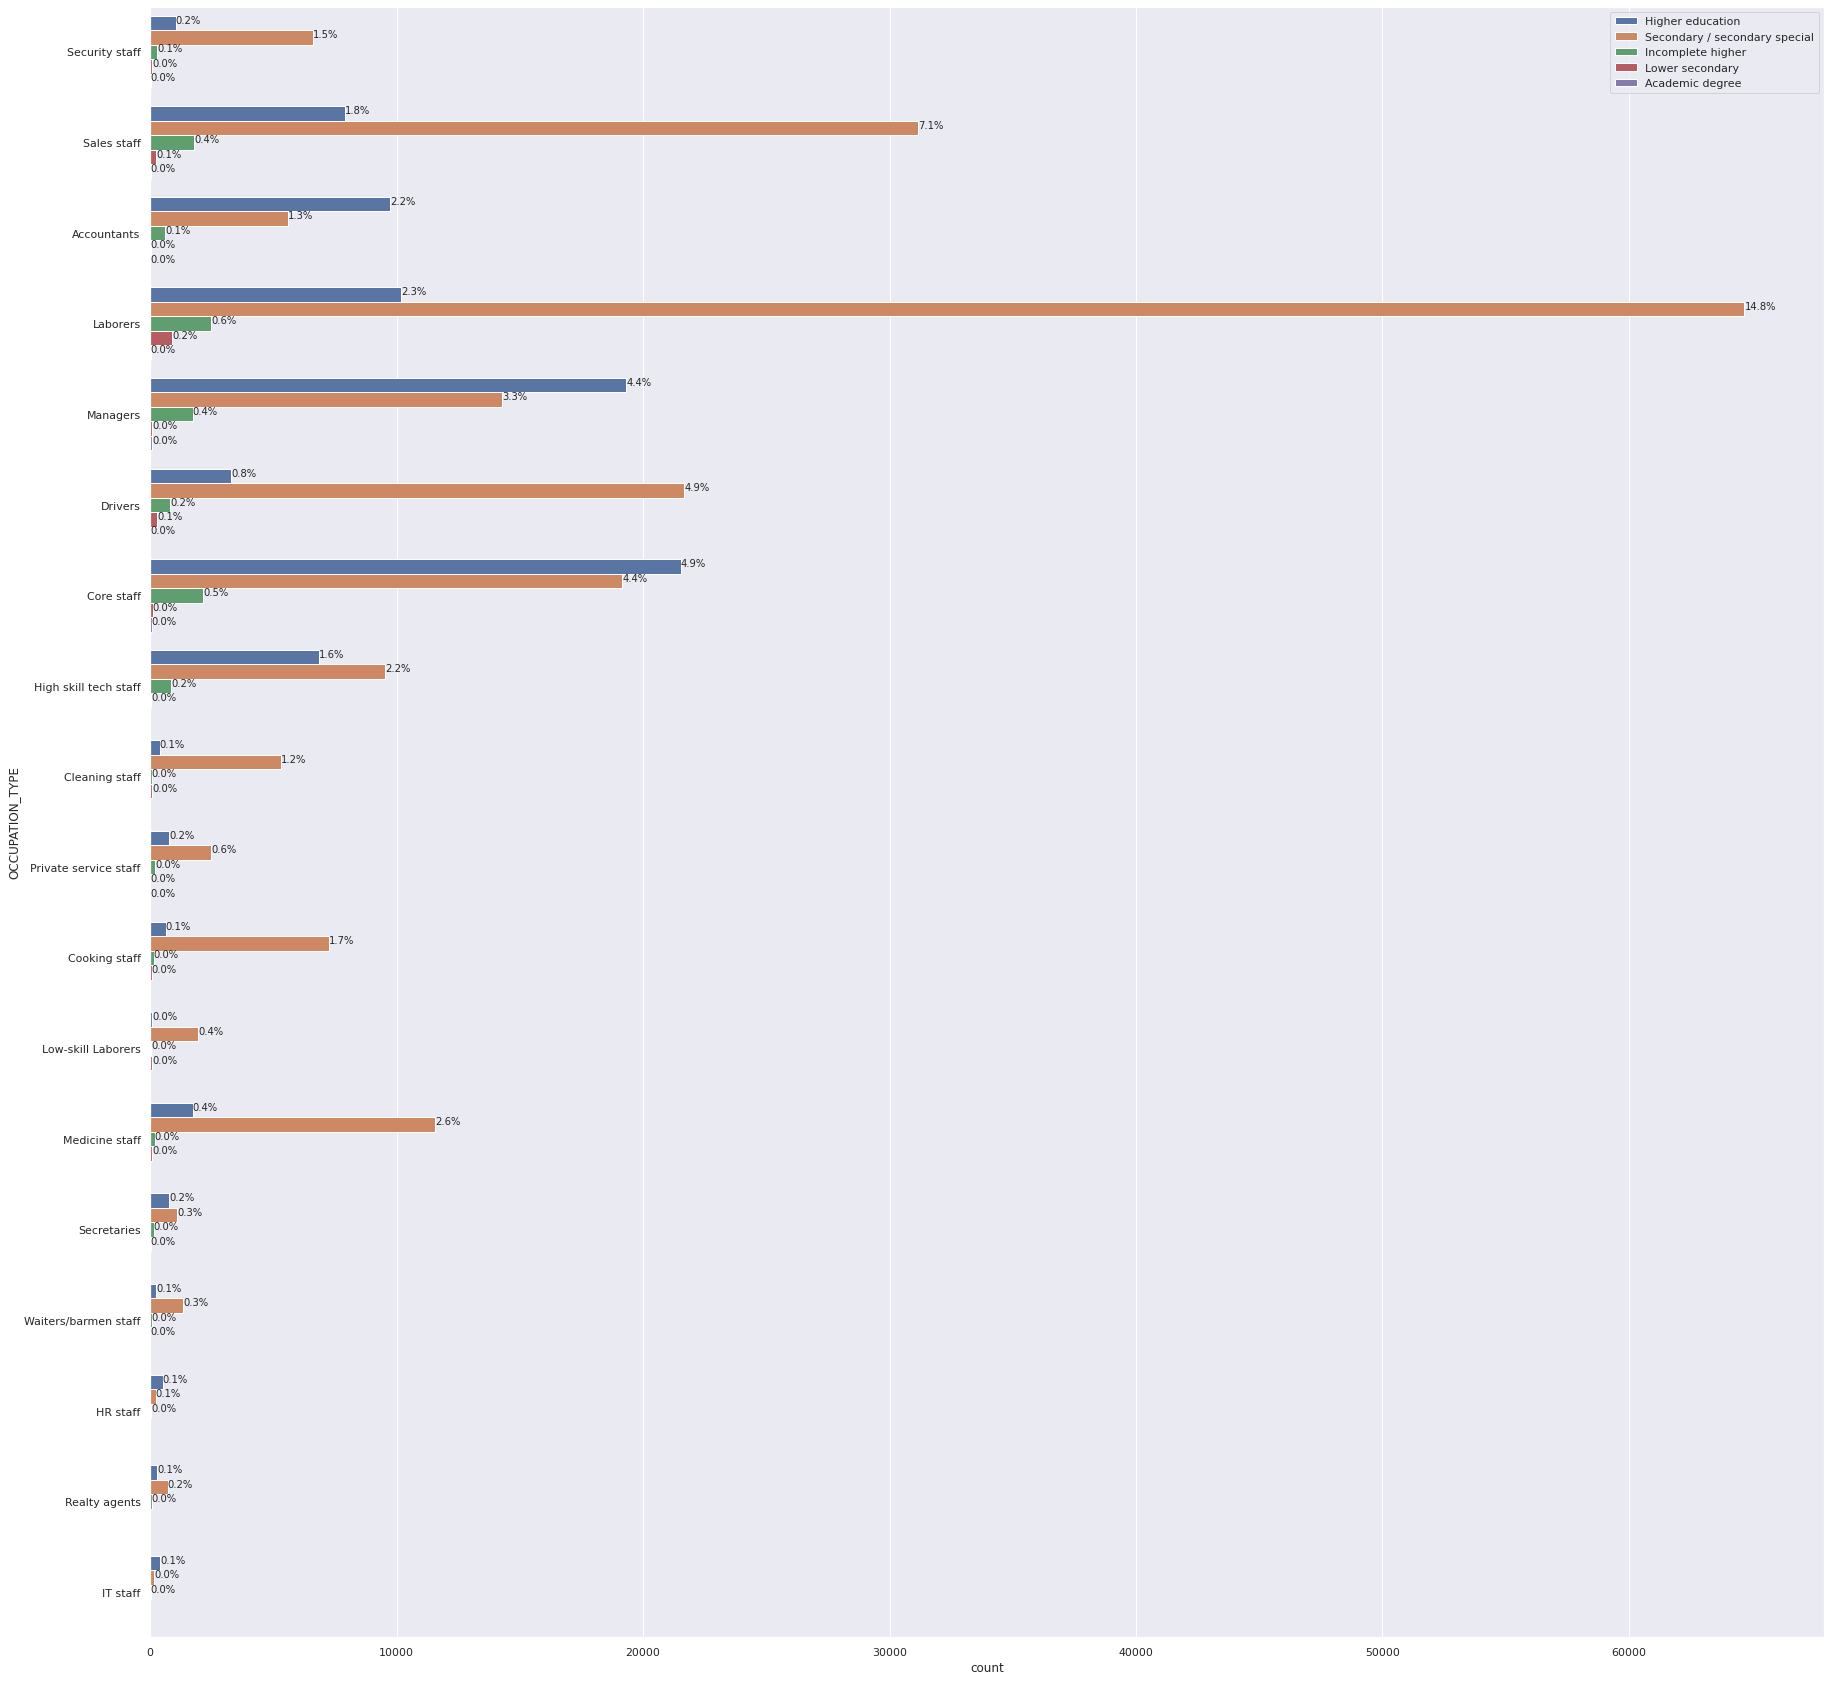

In [ ]:
countplot_occupation(['OCCUPATION_TYPE']) #menampilkan occupation_type 

In [ ]:
def occupation_by_education_by_gender(occupations, educations, genders, length): 
    Gender = []
    Education = []
    Occupation = []
    Percentage = []
    for gender in genders:
        for education in educations:
            for occupation in occupations:
                Gender.append(gender)
                Education.append(education)
                Occupation.append(occupation)
                temp_df_1=application_details.loc[application_details['OCCUPATION_TYPE'] == occupation] # loc digunakan untuk melakukan indexing data , berarti untuk temp_Df_1 menggunakan indeks occupation_type dari data application_details disimpan juga dengan nama lain occupation
                temp_df_2=temp_df_1.loc[temp_df_1['CODE_GENDER'] == gender] #temp_df_2 diambil dari temp_df_1 yang menggunakan indeks code_gender dari temp_df_1 disimpan juga dengan "gender"
                temp_df_3=temp_df_2.loc[temp_df_2['NAME_EDUCATION_TYPE'] == education] #temp_df_3 diambil dari temp_df_2 yang menggunakan indeks name_education_type dari temp_df_2 disimpan juga dengan "education"
                length_filter = len(temp_df_3) #diukur dari panjang teemp_df_3
                Percentage.append(length_filter/length)
    percent_dict={
        'Gender': Gender,
        'Education': Education,
        'Occupation': Occupation,
        'Popularity Percentage': Percentage
    }
    df = pd.DataFrame(percent_dict)
    df.to_excel('Occupation_popularity_index.xlsx', index=False) #define ke excle dengan nama Occupation_popularity_index.xlsx

In [ ]:
occupation_by_education_by_gender(list(application_details['OCCUPATION_TYPE'].unique()), list(application_details['NAME_EDUCATION_TYPE'].unique()), list(application_details['CODE_GENDER'].unique()), len(application_details)) 
#membuat list occupation dari edukasi dan gender 

In [ ]:
occupation_popularity = pd.read_excel('Occupation_popularity_index.xlsx')
#membaca occupation_popularity_index yang sudah dibuat dan disimpan dengan nama occupation_popularity

**Replacing blank 'OCCUPATION_TYPE' with most popular occupation**



In [ ]:
occupation_popularity['Tag'] = occupation_popularity['Gender']+ '_' + occupation_popularity['Education']

--**Insight**--

membuat tag dengan isi gender dan tipe edukasi 

**Creating 'Tag' vs popularity dictionary**

In [ ]:
def Dict(data): #define dictionary
    tag_list=list(data['Tag'].unique())
    popular_occupation = []
    data_grouped = data.groupby('Tag')
    for tag in tag_list:
        grouped_data = data_grouped.get_group(tag)
        popular_occupation.append(grouped_data.loc[grouped_data['Popularity Percentage'] == max(list(grouped_data['Popularity Percentage']))]['Occupation'].tolist()[0])
    Tag_dict={
        'Tag': tag_list,
        'Occupation': popular_occupation
    }
    return Tag_dict

In [ ]:
dict_df = Dict(occupation_popularity) # membuat dict_df yang merupakan dictionary dari occupation popularity

In [ ]:
pd.DataFrame(dict_df).to_excel('Tag_vs_Occupation.xlsx', index=False) #package pandas dan membuat dataframe dan disimpan ke dalam bentuk tag_vs_occupation.xlsx

In [ ]:
tag_data = pd.read_excel('Tag_vs_Occupation.xlsx') #membaca tag_vs_occupation dan disimpan dengan nama tag_data

In [ ]:
tag_data #menampilkan tag_data yang sudah dibuat

,Tag,Occupation
0,M_Higher education,Managers
1,M_Secondary / secondary special,Laborers
2,M_Incomplete higher,Laborers
3,M_Lower secondary,Laborers
4,M_Academic degree,Core staff
5,F_Higher education,Core staff
6,F_Secondary / secondary special,Laborers
7,F_Incomplete higher,Core staff
8,F_Lower secondary,Laborers
9,F_Academic degree,Managers


--**Insight**--

Menampilkan tag (gender,tipe edukasi) dan occupation (managers/laborers/core staff)

In [ ]:
tag_g = list(tag_data['Tag']) #membuat tag_g dari list tag_data bagian tag
occu_g = list(tag_data['Occupation']) # membuat occu_g dari list tag_data bagian occupation
tag_dict = {} #disimpan dalam tag_dict
for index in range(len(tag_g)): 
    tag_dict[tag_g[index]] = occu_g[index]

In [ ]:
tag_dict

{'F_Academic degree': 'Managers',
 'F_Higher education': 'Core staff',
 'F_Incomplete higher': 'Core staff',
 'F_Lower secondary': 'Laborers',
 'F_Secondary / secondary special': 'Laborers',
 'M_Academic degree': 'Core staff',
 'M_Higher education': 'Managers',
 'M_Incomplete higher': 'Laborers',
 'M_Lower secondary': 'Laborers',
 'M_Secondary / secondary special': 'Laborers'}

In [ ]:
application_details['Tag'] = application_details['CODE_GENDER']+ '_' + application_details['NAME_EDUCATION_TYPE'] 

In [ ]:
def Replace_nan_occupation(df): #define occupation yang NaN
    for key in tag_dict:
        if df['Tag'] == key and pd.isnull(df['OCCUPATION_TYPE']):
            df['OCCUPATION_TYPE'] = tag_dict[key]
    return df 

In [ ]:
len(application_details) #menghitung panjang application_details

438557

In [ ]:
application_details = application_details.apply(Replace_nan_occupation, axis=1)
#replace missing values dari df replace_nan_ossupation yang sudah dibuat

In [ ]:
len(application_details) #menghitung panjang application_details

438557

In [ ]:
application_details.isnull().sum() #melihat missing values dari summary  appliaction_details 

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
Tag                    0
dtype: int64

Converting Days format features to readable format

In [ ]:
application_details['AGE'] = np.ceil(pd.to_timedelta(application_details['DAYS_BIRTH'], unit='D').dt.days / -365.25) #mengubah format days_birth

In [ ]:
application_details['AGE']

0         33.0
1         33.0
2         59.0
3         53.0
4         53.0
          ... 
438552    63.0
438553    44.0
438554    23.0
438555    60.0
438556    52.0
Name: AGE, Length: 438557, dtype: float64

In [ ]:
application_details.drop('DAYS_BIRTH', axis=1, inplace=True)

In [ ]:
application_details.loc[(application_details['DAYS_EMPLOYED'] > 0), 'DAYS_EMPLOYED'] = 0
application_details['YEARS_EMPLOYED'] = np.ceil(pd.to_timedelta(application_details['DAYS_EMPLOYED'], unit='D').dt.days / -365.25) #mengubah format days_employed 

In [ ]:
application_details['YEARS_EMPLOYED']

0         13.0
1         13.0
2          4.0
3          9.0
4          9.0
          ... 
438552    -0.0
438553     9.0
438554     2.0
438555    -0.0
438556     4.0
Name: YEARS_EMPLOYED, Length: 438557, dtype: float64

In [ ]:
application_details.drop(['DAYS_EMPLOYED', 'Tag'], axis=1, inplace=True)

In [ ]:
application_details.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'AGE', 'YEARS_EMPLOYED'],
      dtype='object')

Encoding Categorical Features to Numerical Values

In [ ]:
def Cat_to_Num(features): #Mengubah categorical menjadi numerical
    for feature in features:
        feature_list = list(np.unique(application_details[feature]))
        feature_dict = {}
        for i in range(len(feature_list)):
                       feature_dict[feature_list[i]] = i
        application_details.replace({feature : feature_dict}, inplace=True)
        print(feature, '-->', feature_dict)

In [ ]:
categorical_features = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'NAME_HOUSING_TYPE', 'NAME_EDUCATION_TYPE']
Cat_to_Num(categorical_features)

CODE_GENDER --> {'F': 0, 'M': 1}
FLAG_OWN_CAR --> {'N': 0, 'Y': 1}
FLAG_OWN_REALTY --> {'N': 0, 'Y': 1}
NAME_INCOME_TYPE --> {'Commercial associate': 0, 'Pensioner': 1, 'State servant': 2, 'Student': 3, 'Working': 4}
NAME_FAMILY_STATUS --> {'Civil marriage': 0, 'Married': 1, 'Separated': 2, 'Single / not married': 3, 'Widow': 4}
OCCUPATION_TYPE --> {'Accountants': 0, 'Cleaning staff': 1, 'Cooking staff': 2, 'Core staff': 3, 'Drivers': 4, 'HR staff': 5, 'High skill tech staff': 6, 'IT staff': 7, 'Laborers': 8, 'Low-skill Laborers': 9, 'Managers': 10, 'Medicine staff': 11, 'Private service staff': 12, 'Realty agents': 13, 'Sales staff': 14, 'Secretaries': 15, 'Security staff': 16, 'Waiters/barmen staff': 17}
NAME_HOUSING_TYPE --> {'Co-op apartment': 0, 'House / apartment': 1, 'Municipal apartment': 2, 'Office apartment': 3, 'Rented apartment': 4, 'With parents': 5}
NAME_EDUCATION_TYPE --> {'Academic degree': 0, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secondary': 3, 'Seconda

Mengubah

1.   Code Gender = female -> 0 , Male -> 1
2.   Flag = No -> 0 , Yes -> 1
3.   Name Income Type = Commercial associate -> 0 , pensioner -> 1 , State servant -> 2 , Student -> 3 , Working -> 4
4.   Name Family Status = Civil Marriage -> 0 , ...
5.   Occupation Type = Acountant -> 0 , Cleaning Staff -> 1 , Cooking Staff -> 2
6.   Name Housing Type = Co-op apatment -> 0 , House/Apartement -> 1 , Municipal apartment -> 2
7.   Name Education Type = Academic Degree -> 0 , Higher Education -> 1 , Incomplete Higher -> 2 , Lower Secondary -> 3 , Secondary -> 4


In [ ]:
application_details.head(10) # melihat 10 data teratas dari application_details

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED
0,5008804,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,10,2.0,33.0,13.0
1,5008805,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,10,2.0,33.0,13.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,1,0,0,0,16,2.0,59.0,4.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0
5,5008810,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0
6,5008811,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0
7,5008812,0,0,1,0,283500.0,1,1,2,1,1,0,0,0,3,1.0,62.0,-0.0
8,5008813,0,0,1,0,283500.0,1,1,2,1,1,0,0,0,3,1.0,62.0,-0.0
9,5008814,0,0,1,0,283500.0,1,1,2,1,1,0,0,0,3,1.0,62.0,-0.0


#**Credit_record data/evaluation**


---



In [ ]:
convert_to = {'C' : 'Good_Debt', 'X' : 'Good_Debt', '0' : 'Good_Debt', '1' : 'Neutral_Debt', '2' : 'Neutral_Debt', '3' : 'Bad_Debt', '4' : 'Bad_Debt', '5' : 'Bad_Debt'}
credit_record.replace({'STATUS' : convert_to}, inplace=True) #mengubah status C,X,0,1,2,3,4 dan 5

In [ ]:
credit_record #menampilkan credit_record 

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,Good_Debt
1,5001711,-1,Good_Debt
2,5001711,-2,Good_Debt
3,5001711,-3,Good_Debt
4,5001712,0,Good_Debt
...,...,...,...
1048570,5150487,-25,Good_Debt
1048571,5150487,-26,Good_Debt
1048572,5150487,-27,Good_Debt
1048573,5150487,-28,Good_Debt


Counting the number of debts

In [ ]:
credit_record = credit_record.value_counts(subset=['ID', 'STATUS']).unstack(fill_value=0) # subset id dan status

In [ ]:
credit_record #menampilkan credit_record 

STATUS,Bad_Debt,Good_Debt,Neutral_Debt
ID,,,
5001711,0,4,0
5001712,0,19,0
5001713,0,22,0
5001714,0,15,0
5001715,0,60,0
...,...,...,...
5150482,0,18,0
5150483,0,18,0
5150484,0,13,0


Creating Credit Approval Status

In [ ]:
#membuat creidt approval status dengan memberikan penomoran 
credit_record.loc[(credit_record['Good_Debt'] > credit_record['Neutral_Debt']), 'CREDIT_APPROVAL_STATUS'] = 1 # jika  'good debt' lebih besar dari 'neutral debt' maka status credit approval = 1
credit_record.loc[(credit_record['Good_Debt'] > credit_record['Bad_Debt']), 'CREDIT_APPROVAL_STATUS'] = 1 #jika..
credit_record.loc[(credit_record['Neutral_Debt'] > credit_record['Good_Debt']), 'CREDIT_APPROVAL_STATUS'] = 0 #jika...
credit_record.loc[(credit_record['Neutral_Debt'] > credit_record['Bad_Debt']), 'CREDIT_APPROVAL_STATUS'] = 1
credit_record.loc[(credit_record['Bad_Debt'] > credit_record['Good_Debt']), 'CREDIT_APPROVAL_STATUS'] = 0
credit_record.loc[(credit_record['Bad_Debt'] > credit_record['Neutral_Debt']), 'CREDIT_APPROVAL_STATUS'] = 0

In [ ]:
credit_record #menampilkan credit record yang sudah ditambahkan status approval

STATUS,Bad_Debt,Good_Debt,Neutral_Debt,CREDIT_APPROVAL_STATUS
ID,,,,
5001711,0,4,0,1.0
5001712,0,19,0,1.0
5001713,0,22,0,1.0
5001714,0,15,0,1.0
5001715,0,60,0,1.0
...,...,...,...,...
5150482,0,18,0,1.0
5150483,0,18,0,1.0
5150484,0,13,0,1.0


--**Insight**--
didapat status approval dari setiap ID nya

credit approval status untuk 1 = di approve 
, 
credit approval status untuk 0 = tidak di approve  

In [ ]:
np.unique(credit_record['CREDIT_APPROVAL_STATUS']) #package numpy

array([0., 1.])

In [ ]:
credit_record['CREDIT_APPROVAL_STATUS'] = credit_record['CREDIT_APPROVAL_STATUS'].astype('int') # menjadikan tipe data integer

In [ ]:
credit_record

STATUS,Bad_Debt,Good_Debt,Neutral_Debt,CREDIT_APPROVAL_STATUS
ID,,,,
5001711,0,4,0,1
5001712,0,19,0,1
5001713,0,22,0,1
5001714,0,15,0,1
5001715,0,60,0,1
...,...,...,...,...
5150482,0,18,0,1
5150483,0,18,0,1
5150484,0,13,0,1


In [ ]:
credit_record.drop(['Bad_Debt', 'Good_Debt', 'Neutral_Debt'], axis=1, inplace=True) 
#menghilangan kolom bad_debt, good debt dan neutral debt

In [ ]:
credit_record 

STATUS,CREDIT_APPROVAL_STATUS
ID,
5001711,1
5001712,1
5001713,1
5001714,1
5001715,1
...,...
5150482,1
5150483,1
5150484,1


melakukan merging 

In [ ]:
Final_Credit_data = application_details.merge(credit_record, how='inner', on=['ID']) #merge credit dan application data disimpan dalam bentuk final credit data 

In [ ]:
Final_Credit_data.head(10) # melihat 10 data teratas dari final_credit_data 

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,CREDIT_APPROVAL_STATUS
0,5008804,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,10,2.0,33.0,13.0,1
1,5008805,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,10,2.0,33.0,13.0,1
2,5008806,1,1,1,0,112500.0,4,4,1,1,1,0,0,0,16,2.0,59.0,4.0,1
3,5008808,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0,1
4,5008809,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0,1
5,5008810,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0,1
6,5008811,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0,1
7,5008812,0,0,1,0,283500.0,1,1,2,1,1,0,0,0,3,1.0,62.0,-0.0,1
8,5008813,0,0,1,0,283500.0,1,1,2,1,1,0,0,0,3,1.0,62.0,-0.0,1
9,5008814,0,0,1,0,283500.0,1,1,2,1,1,0,0,0,3,1.0,62.0,-0.0,1


In [ ]:
credit_approval_data = Final_Credit_data.drop('ID', axis=1, inplace=False)

In [ ]:
credit_approval_data #melihat credit approval data keseluruhan 

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,CREDIT_APPROVAL_STATUS
0,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,10,2.0,33.0,13.0,1
1,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,10,2.0,33.0,13.0,1
2,1,1,1,0,112500.0,4,4,1,1,1,0,0,0,16,2.0,59.0,4.0,1
3,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0,1
4,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1,1,1,0,315000.0,4,4,1,1,1,0,0,0,10,2.0,48.0,7.0,0
36453,0,0,1,0,157500.0,0,1,1,1,1,0,1,1,11,2.0,34.0,4.0,0
36454,0,0,1,0,157500.0,1,1,1,1,1,0,1,1,11,2.0,34.0,4.0,1
36455,0,0,1,0,283500.0,4,4,1,1,1,0,0,0,14,2.0,50.0,2.0,1


In [ ]:
credit_approval_data.describe().T # describe credit approval data dan di transpose

,count,mean,std,min,25%,50%,75%,max
CODE_GENDER,36457.0,0.329895,0.470181,0.0,0.0,0.0,1.0,1.0
FLAG_OWN_CAR,36457.0,0.379708,0.485321,0.0,0.0,0.0,1.0,1.0
FLAG_OWN_REALTY,36457.0,0.672189,0.469422,0.0,0.0,1.0,1.0,1.0
CNT_CHILDREN,36457.0,0.430315,0.742367,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,36457.0,186685.736662,101789.226482,27000.0,121500.0,157500.0,225000.0,1575000.0
NAME_INCOME_TYPE,36457.0,2.398195,1.734032,0.0,1.0,4.0,4.0,4.0
NAME_EDUCATION_TYPE,36457.0,3.097183,1.341292,0.0,1.0,4.0,4.0,4.0
NAME_FAMILY_STATUS,36457.0,1.367885,0.954557,0.0,1.0,1.0,1.0,4.0
NAME_HOUSING_TYPE,36457.0,1.282881,0.951675,0.0,1.0,1.0,1.0,5.0
FLAG_MOBIL,36457.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


#**Splitting the credit_approval_data into training and testing sets**

In [ ]:
from sklearn.model_selection import train_test_split  # import train_test_split dari sklearn

In [ ]:
X = credit_approval_data.drop('CREDIT_APPROVAL_STATUS', axis=1) # membagi Bagian menjadi X dan Y 
y = credit_approval_data['CREDIT_APPROVAL_STATUS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
#membagi data training dan data testing

creting decision tree model

In [ ]:
from sklearn.tree import DecisionTreeClassifier #import decisiontreeclassifier dari sklearn

In [ ]:
DT_model = DecisionTreeClassifier() #membuat DT_model dengan decisiontreeclassifier

training model

In [ ]:
DT_model.fit(X_train, y_train) #training model dari x_train dan y_train

DecisionTreeClassifier()

prediction

In [ ]:
y_pred = DT_model.predict(X_test) #membuat y prediction dari X_test DT_model

Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score # import accuracy score dari sklearn 

In [ ]:
accuracy_score(y_test, y_pred) #melakukan akurasi data dengan y_test, y_predict

0.994240263302249

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

(21900    1
24293    1
19633    1
2496     1
25932    1
        ..
12738    1
29745    1
17518    1
34043    1
26570    1
Name: CREDIT_APPROVAL_STATUS, Length: 10938, dtype: int64, array([1, 1, 1, ..., 1, 1, 1]))


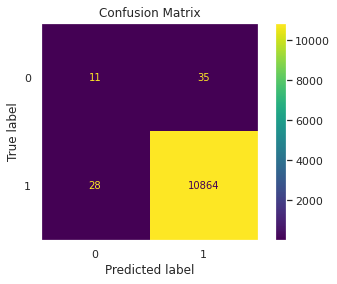

In [ ]:
print((y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

Hasil Akurasi 0.99 untuk model ini 

Saving Model

In [ ]:
import pickle # menyimpan model

In [ ]:
with open('Credit_Approval_DT_model', 'wb') as f:
    pickle.dump(DT_model, f)